In [ ]:
#-------------------[IMPORT MODEL]-----------------------#
import pandas as pd
import yfinance as yf
from datetime import datetime , timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Index(['Symbol', 'Company Name', 'Security Name', 'Market Category',
       'Test Issue', 'Financial Status', 'Round Lot Size', 'ETF',
       'NextShares'],
      dtype='object')

 The Stock Found:
     Symbol                     Company Name
250    AMRK     A-Mark Precious Metals, Inc.
318    AQMS                Aqua Metals, Inc.
354    ARVR  First Trust Indxx Metaverse ETF
1122   CRML            Critical Metals Corp.
1123  CRMLW            Critical Metals Corp.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21764\2366135478.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="10y")
[*********************100%***********************]  1 of 1 completed



 Stock data for AMRK:
Price           Close       High        Low       Open  Volume
Ticker           AMRK       AMRK       AMRK       AMRK    AMRK
Date                                                          
2025-10-13  27.500000  28.105000  26.549999  26.809999  382700
2025-10-14  27.709999  27.860001  26.761000  26.850000  386500
2025-10-15  27.950001  28.910000  27.770000  28.200001  346000
2025-10-16  29.700001  29.790001  28.110001  28.110001  798600
2025-10-17  27.600000  29.400000  27.456699  29.180000  269070


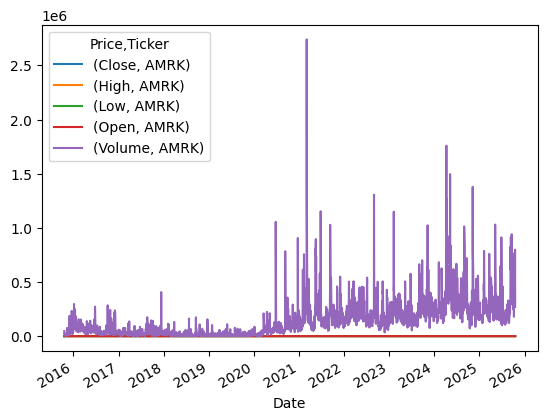

In [40]:

# Read CSV
stock_name = pd.read_csv('stock/nasdaq-listed-symbols.csv')

# Check column names
print(stock_name.columns)

# User input
search = input("Enter the name of the stock or Symbol: ").strip()

# Match
matches = stock_name[
    stock_name['Company Name'].str.contains(search, case=False, na=False) |
    stock_name['Symbol'].str.contains(search, case=False, na=False)
]

if matches.empty:
    print("This stock name or symbol is incorrect.")
else:
    print("\n The Stock Found:")
    print(matches[['Symbol', 'Company Name']].head())

    ticker = matches.iloc[0]['Symbol']

    # Fetch stock data
    data = yf.download(ticker, period="10y")
    print(f"\n Stock data for {ticker}:")
    print(data.tail())
    
    data.plot()
    plt.show()


In [41]:
data = yf.download(ticker , period = '15y')

# data to downlaod and store for ML tranning 
data.to_csv(f"Tranning/stock_data/{ticker}_data.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21764\207885259.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker , period = '15y')
[*********************100%***********************]  1 of 1 completed


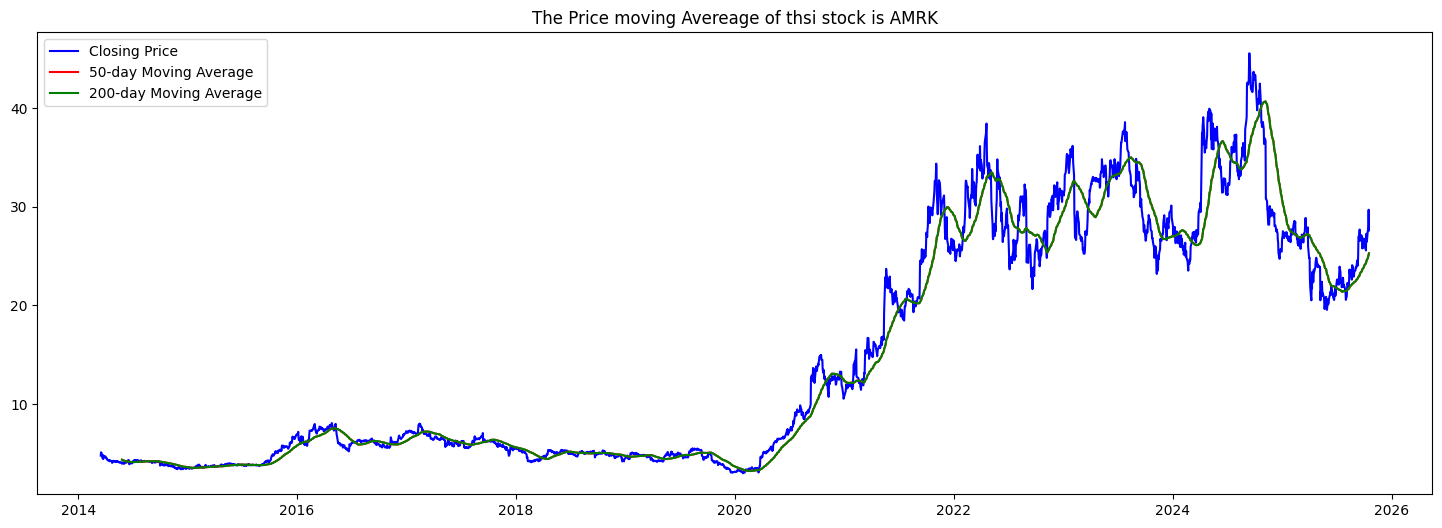

In [42]:
# Basic Visualization (Matplotlib)

data["MA50"] = data['Close'].rolling(50).mean()
data["MA200"] = data['Close'].rolling(50).mean()


plt.figure(
    figsize=(18 , 6)
)
plt.plot(
    data['Close'] , label = "Closing Price" , color = 'Blue'
)
plt.plot(
    data['MA50'] , label = '50-day Moving Average' , color = 'red'
)
plt.plot(
    data['MA200'] , label = '200-day Moving Average' , color = 'green'
)

plt.legend()

plt.title(f"The Price moving Avereage of thsi stock is {ticker}")
plt.show()


In [ ]:
import plotly.graph_objects as go
# Assuming your DataFrame 'data' is already cleaned
# Ensure numeric columns and datetime index
data['Date'] = pd.to_datetime(data.index)  # if Date is index
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

# Remove any rows with NaN
data.dropna(inplace=True)

# Create candlestick chart with volume
fig = go.Figure()

# Candlesticks
fig.add_trace(go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    name='Price'
))

# Volume bars
fig.add_trace(go.Bar(
    x=data['Date'],
    y=data['Volume'],
    name='Volume',
    marker_color='lightgray',
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Stock Price with Volume',
    yaxis=dict(title='Price', side='left'),
    yaxis2=dict(title='Volume', overlaying='y', side='right', showgrid=False, position=0.15),
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)


fig.show()